In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
car = pd.read_csv('quikr_car.csv')

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
car.shape

(892, 6)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
# create backup copy
backup = car.copy()

<h2>Cleanning Data</h2>

In [7]:
car = car[car['year'].str.isnumeric()]

In [8]:
car['year'] = car['year'].astype(int)

In [9]:
car = car[car['Price'] != 'Ask For Price']

In [10]:
car['Price'] = car['Price'].str.replace(',', '').astype(int)

In [11]:
car['kms_driven'] = car['kms_driven'].str.split().str.get(0).str.replace(',','')

In [12]:
car = car[car['kms_driven'].str.isnumeric()]
car['kms_driven'] = car['kms_driven'].astype(int)

In [13]:
car = car.dropna()

In [14]:
# reset the index of cleaned data
car = car.reset_index(drop=True)

<h2>Cleaned Data</h2>

In [15]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [16]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [17]:
car = car[car['Price'] < 6e6]

In [18]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [19]:
car.to_csv('cleaned_car.csv')

<h2>Company and Price</h2>

In [20]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

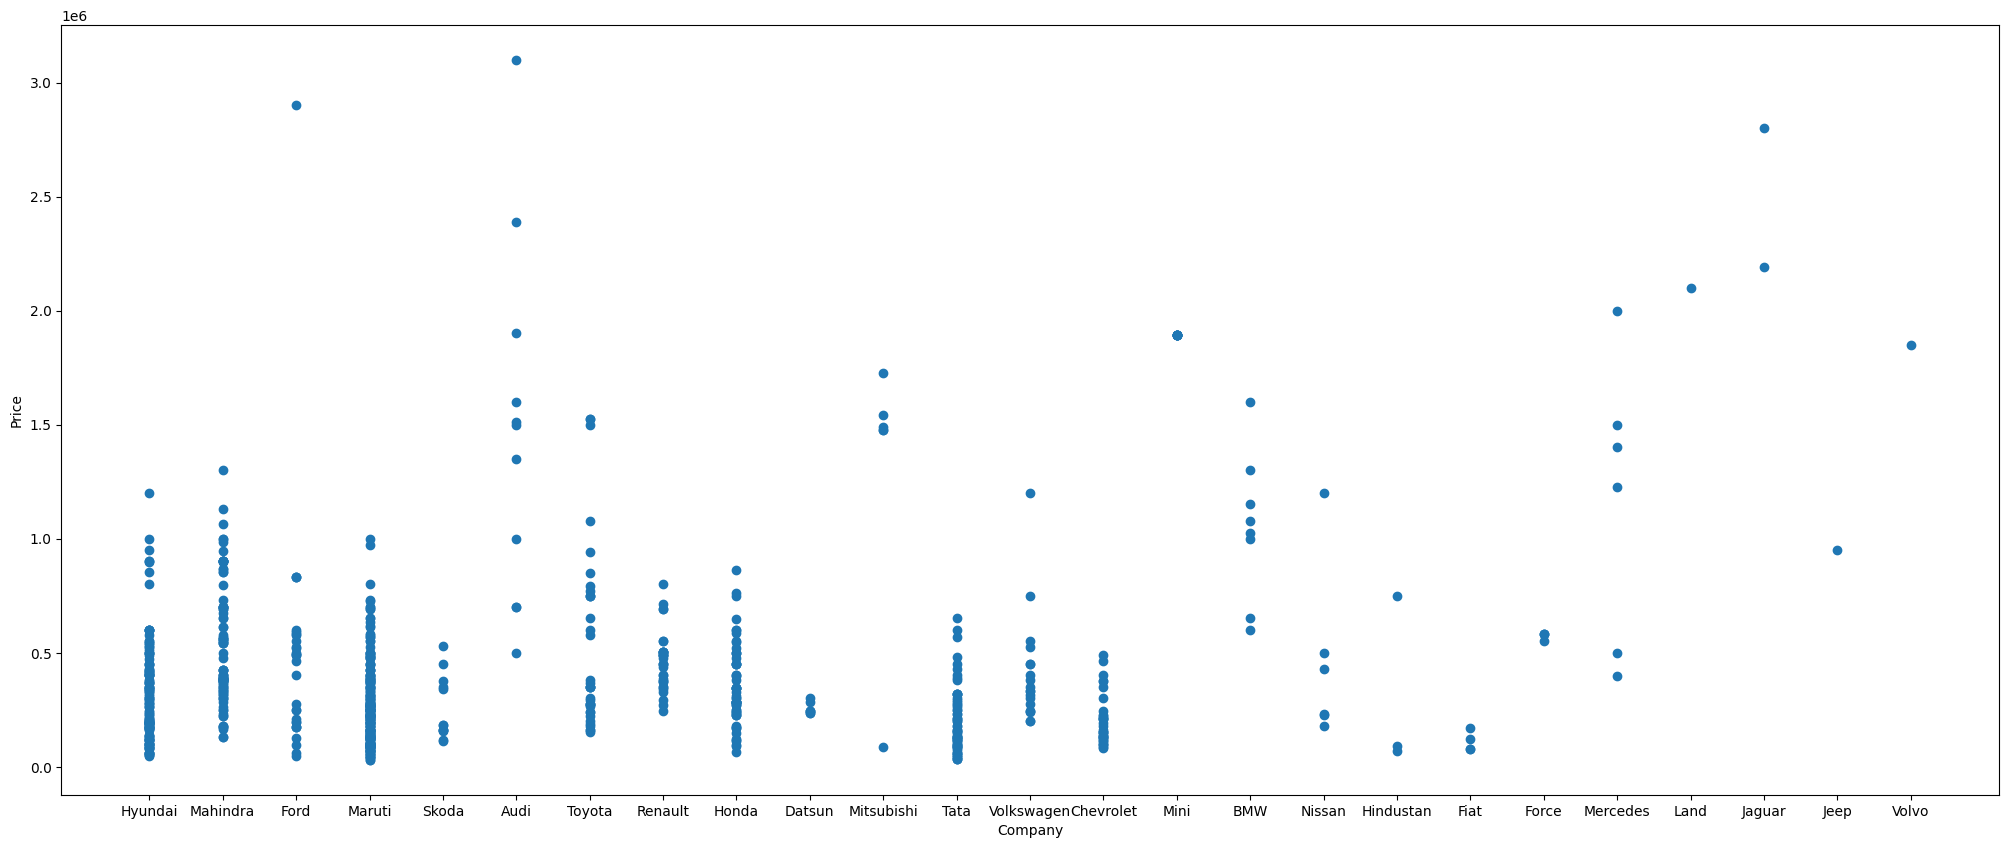

In [21]:
plt.figure(figsize=(25,10))
plt.scatter(car['company'], car['Price'])
plt.xlabel('Company')
plt.ylabel('Price')

plt.show()

<h2>Year and Price</h2>

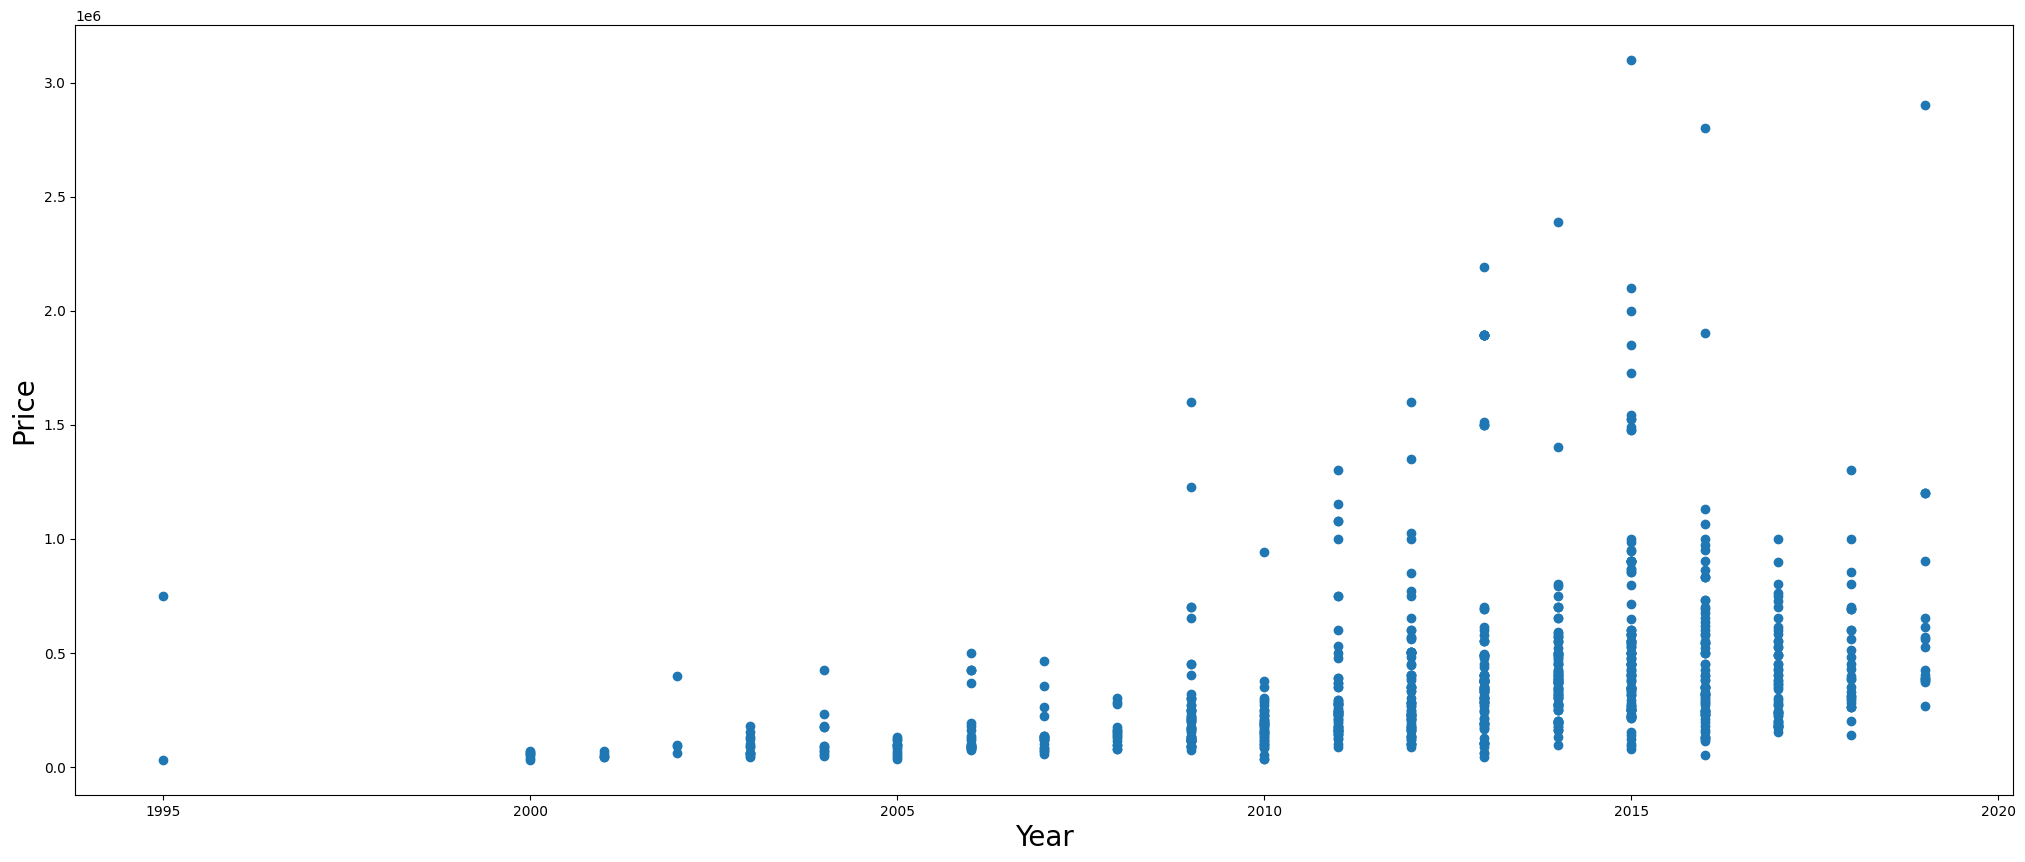

In [22]:
plt.figure(figsize=(25,10))
plt.scatter(car['year'], car['Price'])
plt.xlabel('Year', fontsize=20)
plt.ylabel('Price', fontsize = 20)
plt.show()

<h2>KMS_Driven and Price</h2>

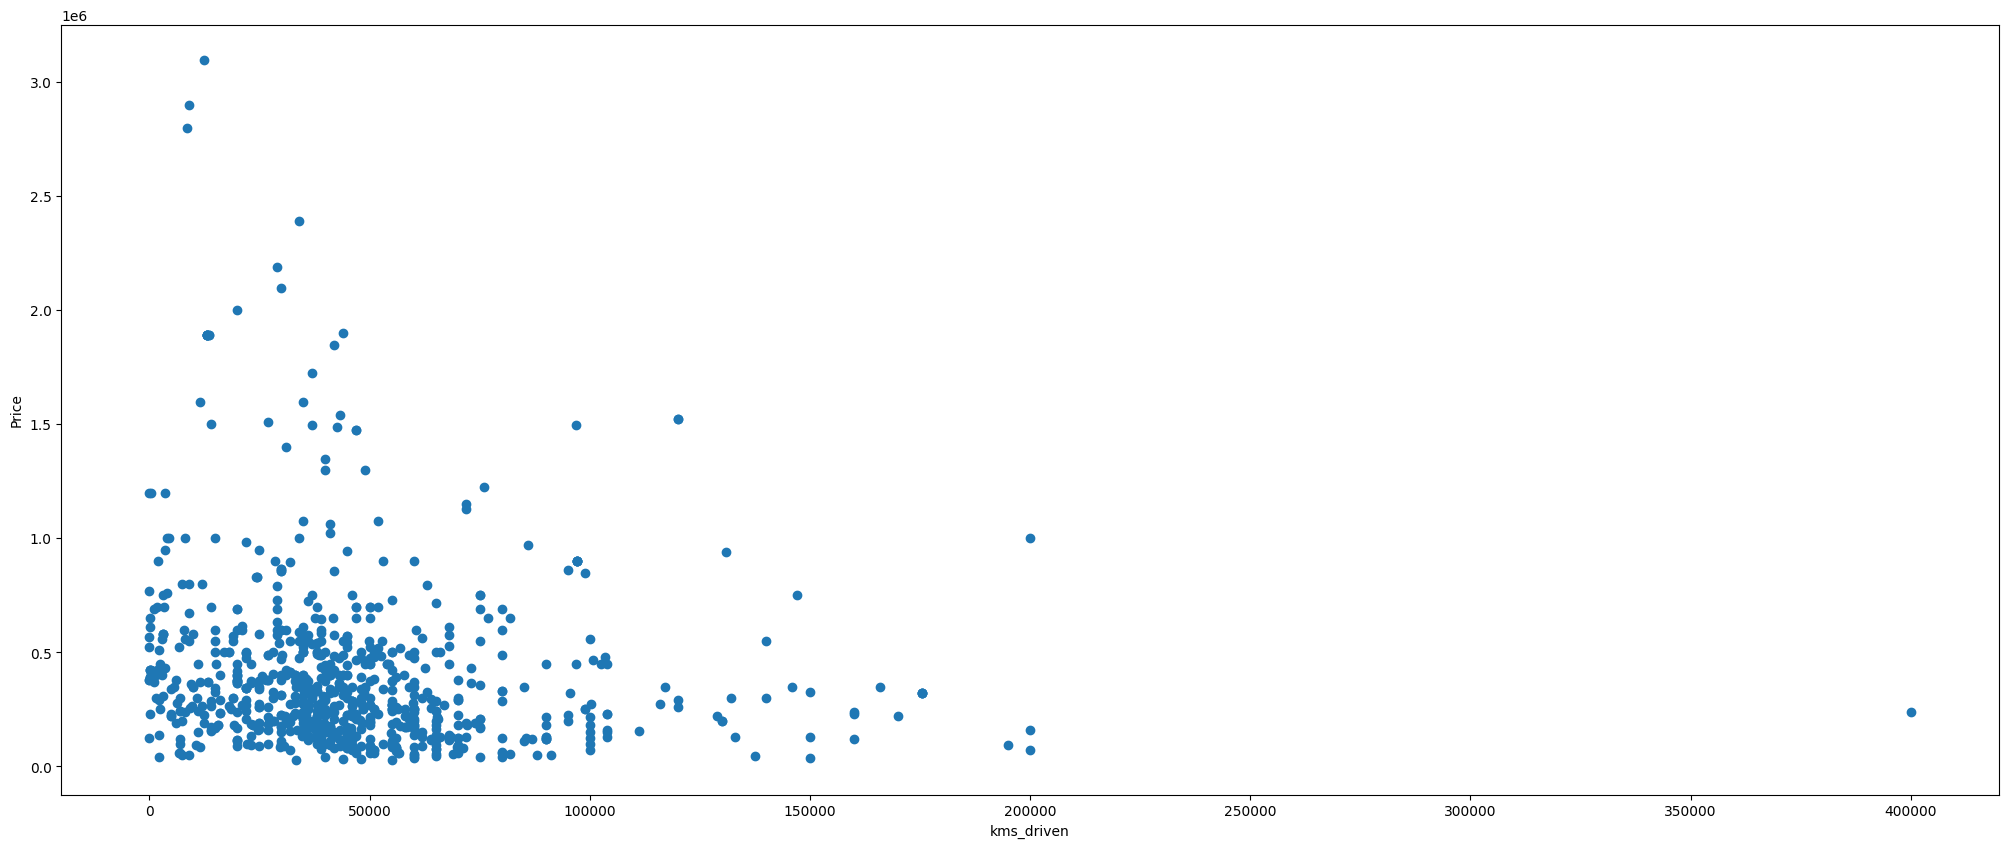

In [23]:
plt.figure(figsize=(25,10))
plt.scatter(car['kms_driven'], car['Price'])
plt.xlabel('kms_driven')
plt.ylabel('Price')

plt.show()

<h2>Fuel Type and Price</h2>

In [24]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

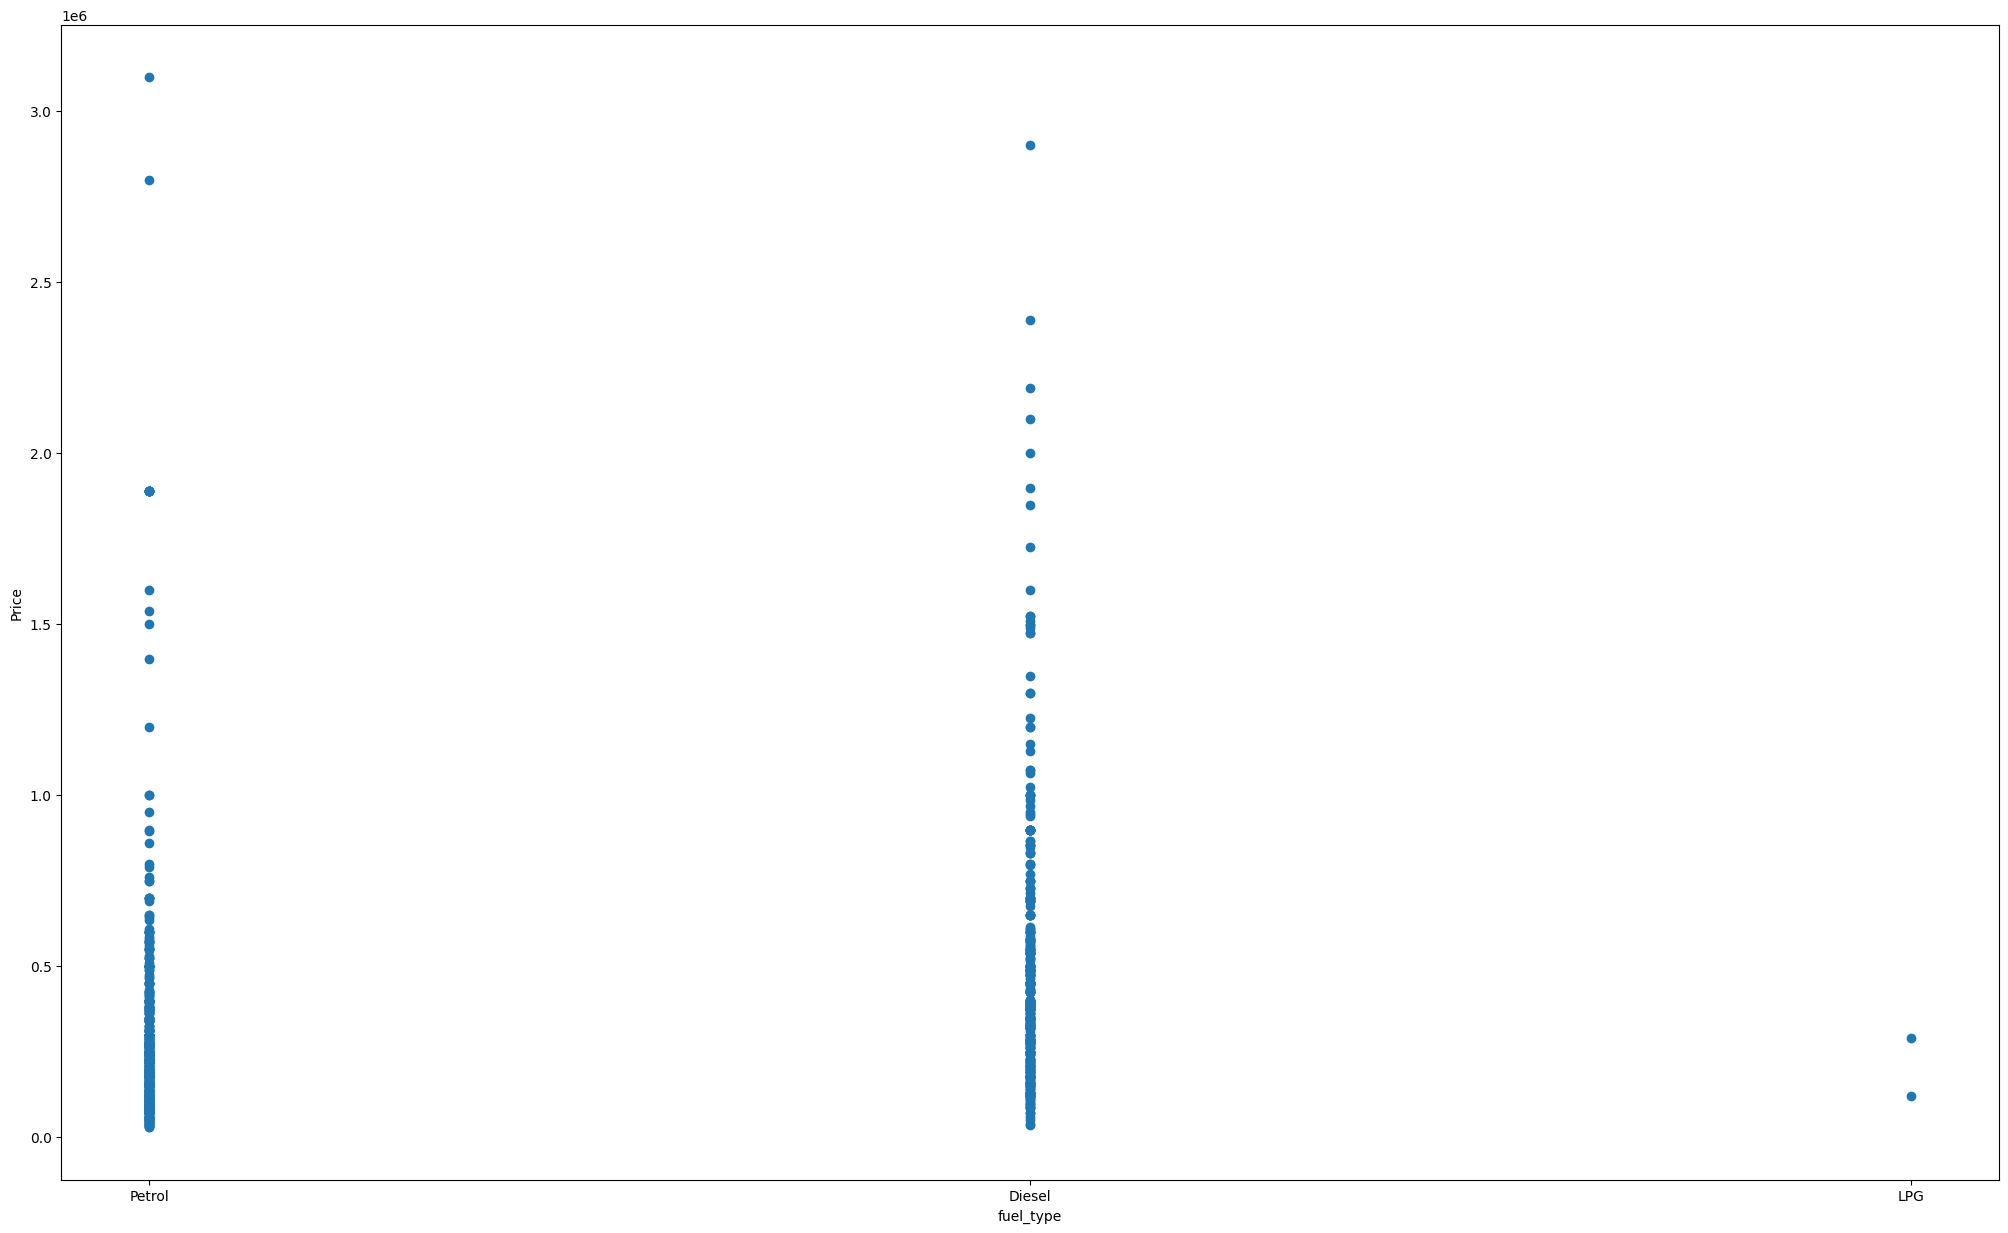

In [25]:
plt.figure(figsize=(25,15))
plt.scatter(car['fuel_type'], car['Price'])
plt.xlabel('fuel_type')
plt.ylabel('Price')

plt.show()

<h2>Model</h2>

In [26]:
X = car.drop(columns = 'Price')
y = car['Price']

In [27]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz VXI ABS,Maruti,2011,50000,Petrol
812,Tata Indica V2 DLE BS III,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM Diesel,Tata,2018,27000,Diesel


In [28]:
y.shape

(815,)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [31]:
ohe = OneHotEncoder()
ohe.fit(X[['name', 'company', 'fuel_type']])

OneHotEncoder()

In [32]:
column_trans = make_column_transformer((OneHotEncoder(categories = ohe.categories_),
                                        ['name','company','fuel_type']), remainder='passthrough')

In [33]:
lr = LinearRegression()

In [34]:
pipe = make_pipeline(column_trans, lr)

In [35]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet 40 TFSI',
       'Audi A4 1.8 TFSI Multitronic Premium Plus',
       'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium',
       'Audi A8', 'Audi Q3 2.0 TDI quattro Premium',
       'Audi Q5 2.0 TDI quattro Premium Plus', 'Audi Q7',
       'BMW 3 Series 320d...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [36]:
y_pred = pipe.predict(X_test)

In [37]:
r2_score(y_test, y_pred)

0.5017796586219447

In [38]:
scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans, lr)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test, y_pred))

In [39]:
np.argmax(scores)

636

In [40]:
scores[np.argmax(scores)]

0.8656152757552

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1, random_state=np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(column_trans,lr)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test, y_pred)

0.8656152757552

In [42]:
import pickle

In [43]:
pickle.dump(pipe, open('LinearRegressionModel.pkl', 'wb'))

In [44]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift', 'Maruti', 2019, 100, 'Petrol']], 
                             columns = ['name','company','year', 'kms_driven', 'fuel_type']))

array([461522.04764179])

In [45]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet 40 TFSI',
       'Audi A4 1.8 TFSI Multitronic Premium Plus',
       'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium',
       'Audi A8', 'Audi Q3 2.0 TDI quattro Premium',
       'Audi Q5 2.0 TDI quattro Premium Plus', 'Audi Q7',
       'BMW 3 Series 320d Sedan', 'BMW 3 Series 320i',
       'BMW 5 Series 520d Sedan', 'BMW 5 Series 530i',
       'BMW 7 Series 740Li Sedan', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d xLine', 'Chevrolet Beat',
       'Chevrolet Beat Diesel', 'Chevrolet Beat LS Diesel',
       'Chevrolet Beat LS Petrol', 'Chevrolet Beat LT Diesel',
       'Chevrolet Beat LT Opt Diesel', 'Chevrolet Beat LT Petrol',
       'Chevrolet Beat PS Diesel', 'Chevrolet Cruze LTZ',
       'Chevrolet Cruze LTZ AT', 'Chevrolet Enjoy',
       'Chevrolet Enjoy 1.4 LS 8 STR', 'Chevrolet Sail 1.2 LS',
       'Chevrolet Sail UVA Petrol LT ABS', 'Chevrolet Spark',
       'Chevrolet Spark 1.0 LT', 'Chevrolet Spark LS 1.0',
       'Chevrolet Spar